In [ ]:
pip install tensorflow

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

We use MNIST dataset for digit recognition, Sequential for constructing the model, to_categorical for binary vectors, flatten for converting inputs into vectors and Dense to set the hidden/output layers.


In [34]:
# we load mnist data set
(in_train, out_train), (in_test, out_test) = mnist.load_data()

# normalize pixel values between 0 and 1
def normalize_image(img):
  return img/255.0

in_train = normalize_image(in_train)
in_test = normalize_image(in_test)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


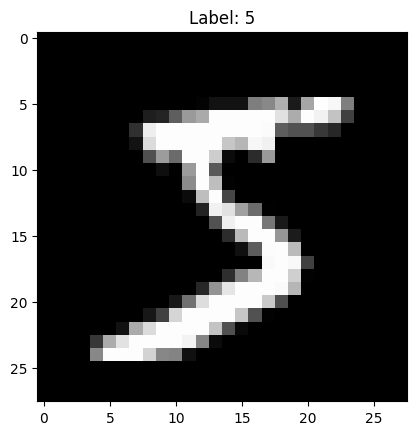

In [35]:
# show size of images
print(f'x_train shape: {in_train.shape}')  # (60000, 28, 28)
print(f'y_train shape: {out_train.shape}')  # (60000,)
print(f'x_test shape: {in_test.shape}')    # (10000, 28, 28)
print(f'y_test shape: {out_test.shape}')    # (10000,)

# print image
plt.imshow(in_train[0], cmap='gray')
plt.title(f'Label: {out_train[0]}')
plt.show()

Loss functions such as categorical_crossentropy usually espects the output layer activations to be in one-hot format. So for each class we got an array of 1 and 0 values. In our case we are using digit recognition from 0 to 9 so we have 10 arrays in the form of: [0,1,0,0,0,0,0,0,0,0] for 1, [0,1,0,0,0,0,0,0,1,0] for 9

In [36]:
# 10 is the class number.
def oneHot_converter(y):
  return to_categorical(y,10)

out_train = oneHot_converter(out_train)
out_test = oneHot_converter(out_test)

Now we are going to create the model using Keras. We flatten the image pixels as a unidimensional array, going from 28x28 to 784, we set a hidden layer and our output layer.



In [37]:
model = Sequential([
    Flatten(input_shape=(28,28)), # flattening of the image
    Dense(128, activation="relu"), # hidden layer of 128 neurons using relu activation (relu(x) = max(0,x))
    Dense(10, activation="softmax") # output layer of 10 neurons using softmax activation
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For compiling our model, we need to set the optimizer (method using for re-set weights, calculating the gradient of the loss function), choose loss function and the metrics used for measuring how good is the model performing.

In [38]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics=["accuracy"] # accuracy = correct predictions / total predictions
)

Now we train our model setting some parameters.

In [44]:
trained = model.fit(
    in_train,
    out_train,
    epochs = 5, # the algorithm is gonna repeat the process of training the given data 5 times.
    batch_size = 32, # quantity of inputs of each epoch
    validation_split = 0.2 # split 20% of the data for validation
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9975 - loss: 0.0106 - val_accuracy: 0.9862 - val_loss: 0.0531
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9842 - val_loss: 0.0592
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9973 - loss: 0.0092 - val_accuracy: 0.9822 - val_loss: 0.0678
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9858 - val_loss: 0.0591
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9818 - val_loss: 0.0728


In [43]:
test_loss, test_accuracy = model.evaluate(in_test, out_test) #calculate loss and accuracy
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0977
Test Loss: 0.0816684365272522
Test Accuracy: 0.9768999814987183


In [45]:
# get model predictions
y_pred = np.argmax(model.predict(in_test), axis=1)
y_true = np.argmax(out_test, axis=1)

cm = confusion_matrix(y_true, y_pred) # calculate the confusion matrix
print("Confusion Matrix:\n", cm)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[ 962    0    2    0    1    4    6    0    4    1]
 [   0 1122    5    1    0    0    1    4    1    1]
 [   2    0 1013    3    4    1    2    2    5    0]
 [   0    0    6  977    2    7    0    4    5    9]
 [   1    1    2    0  974    0    1    0    0    3]
 [   2    0    0    2    1  876    5    1    3    2]
 [   2    1    1    1    7    8  937    0    1    0]
 [   1    2   11    4    4    0    0  999    1    6]
 [   0    1    3    4    5   14    1    4  932   10]
 [   0    2    0    2   14    4    1    3    1  982]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


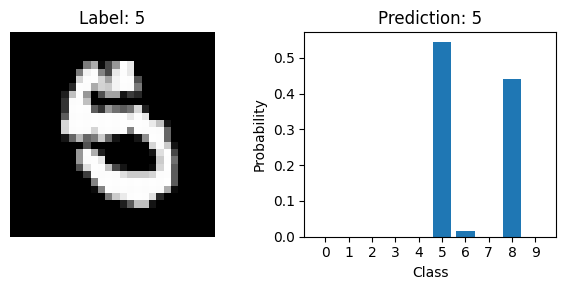

In [54]:
# Seleccionar una imagen de prueba (por ejemplo, la primera imagen del conjunto de prueba)
index = 2224
image = in_test[index]
true_label = np.argmax(out_test[index])  # output in one-hot format

# make a prediction using our model
prediction = model.predict(np.expand_dims(image, axis=0))  # add one dimension for the batch
predicted_label = np.argmax(prediction)

# visualize image and prediction
plt.figure(figsize=(6, 3))

# image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'Label: {true_label}')
plt.axis('off')

# prediction
plt.subplot(1, 2, 2)
plt.bar(range(10), prediction[0], tick_label=range(10))
plt.title(f'Prediction: {predicted_label}')
plt.xlabel('Class')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()
